# Clasificación
es la tarea de asignar cada instancia de entrada o característica a una categoría o clases predefinidas.

Palabras simples, trata de predecir si un conjunto de datos basados en características observables (características de entrada) pertenece a una categoría específica entre otras.

El modelo aprende las relaciones entre las características o las etiquetas/clases, *siempre basándose en ejemplos previamente etiquetados*

## Algoritmos para clasificación
- Regresión Logística: se usa para problemas de clasificación binaria, modela la *probabilidad de que pertenecen a una clase particular*
- árboles de decisiones: es una estructura de árbol donde
    *nodo interno:* rep una característica
    *rama:* decisión basada en en esa carac
    *hoja:*  etiqueta o clase a la que se llegó por medio de las decisiones tomadas al llegar a cada nodo.
- vecinos cercanos (K-NN): se basa en la idea que as características similares tienen etiquetas similares. Donde **k son la cantidad de vecinos considerados**

### Pasos para modelo de aprendizaje supervidasado
#### 1. Conjunto de Datos

Las librerías nuevas son las siguientes:

-	train_test_split: Dividir el conjunto de datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.
-	accuracy_score: Calcular la precisión del modelo.
-	confusion_matrix: Crear una matriz de confusión para mostrar el número de predicciones correcta e incorrectas
-	DecisionTreeClassifier: Implementar un clasificador de árbol de decisiones, como algoritmo de Clasificación de aprendizaje supervisado


In [25]:
# Importar librerías

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#calcular la matriz de confusión y calcular la precisión del modelo
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
# Para dibujar la matriz de confusión por medio de mapa de calor
import seaborn as sns


In [9]:
#Leer el archivo
datos=pd.read_csv('diabetes_prediction_dataset.csv')
#Mostrar los datos
datos.head()
#En caso de borrar una columna usar
#datos=datos.drop('name_column',axis=1)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,1,25.19,6.6,140,0
1,1,54.0,0,0,0,27.32,6.6,80,0
2,0,28.0,0,0,1,27.32,5.7,158,0
3,1,36.0,0,0,3,23.45,5.0,155,0
4,0,76.0,1,1,3,20.14,4.8,155,0


##

In [10]:
#Mostrar estadísticas del df
datos.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.585880,41.885856,0.07485,0.039420,1.332750,27.320767,5.527507,138.058060,0.085000
std,0.492937,22.516840,0.26315,0.194593,1.471628,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,1.000000,43.000000,0.00000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,2.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


In [15]:
#Separar los datos de entrada X (características) Y (etiquetas o clases o categorías)
x=datos.iloc[:,:-1]# son las características nodos internos 
y=datos.iloc[:,-1]# son las clases o etiquetas verdaderas

#### 2. Separar los datos de entranamiento y prueba

In [16]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=25)

#### 3. Crear el modelo

In [17]:
modelo=DecisionTreeClassifier()

#### 4. Entrenar el modelo con los características de entrada y etiquetas para entrenammieto
Es decir se entrena con ejemplos de entrada con sus respectivas etiquetas

In [19]:
modelo.fit(x_train,y_train) #x_train y y_train son el conjunto de datos de entrenamiento

DecisionTreeClassifier()

#### 5. Predicciones de prueba para determinar el rendimiento del modelo

y_predicted almacenará las clasificaciones realizadas por el modelo, que no necesariamente coindicidiran con los valores reales de etiquetas *y_test*, esta y *y_predicted* nos ayudaran a evaluar el modelo

In [20]:
y_predicted=modelo.predict(x_test)

#### 6. Métricas de evaluación
- Exactitud: proporción del n de predicciones correctas sobre el total de predicciones realizadas. Osea las n vecen en que coincidan las clases asignadas por y_predict y y_test respecto a las mismas características de entrada sobre el total de predicciones con la función *.predicted()*

In [23]:
exactitud = accuracy_score(y_test, y_predicted)
print(f"La excatitud obtenida es de: {exactitud}")

La excatitud obtenida es de: 0.95135


- Matriz de confusión: tabla que muestra el número de prediciones correctas e incorrectas realizadas por un modelo en cada clase. Si es clasifiación binaria, se observan los:
    -   Verdaderos negativos (TN- clas. correcta negativa)
    -   Falsos Postitivos (FP clas. incorrecta positiva)
    -   los Falsos negativos (FN clas. incorrecta negativa)
    -   los Verdaderos positivos(VP clas. correcta positiva)

se procede a crear una matriz de confusión con los dos conjuntos de etiquetas (‘y_predicted’ y ‘y_test’) con la función confusión_matrix, el resultado de esta es una tabla que muestra la cantidad de clasificaciones correctas e incorrectas en cada clase que se almacena en una variable llamada matriz. **Cada fila representa la clase real a la que pertenecen los ejemplos de entrada en el conjunto de datos (Y_test) y las columnas representan las clases a las que el modelo ha asignado a las entradas de prueba después de su entrenamiento (y_predicted)**

In [24]:
#Matriz de confusión
matriz = confusion_matrix(y_test, y_predicted)

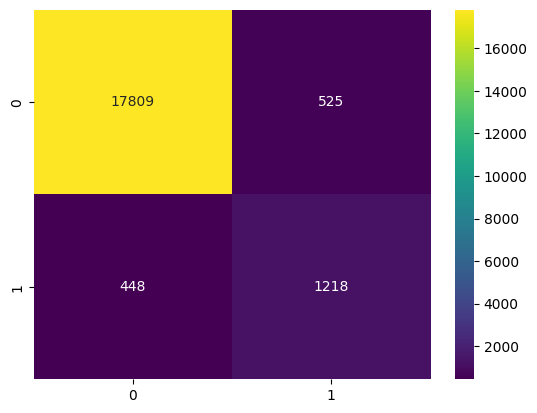

In [26]:
#dibujar la matriz con un mapa de calor
sns.heatmap(matriz, annot=True, fmt='d', cmap="viridis")
plt.show()

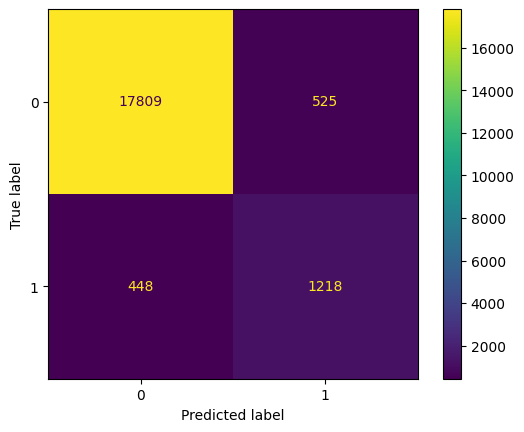

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
confusionMatrixDisplay=ConfusionMatrixDisplay(
    #Confusión matrix
    matriz,
    display_labels=modelo.classes_
)

confusionMatrixDisplay.plot(cmap="viridis")

In [28]:
#ver la matriz como una matriz numpy
print(f"La matriz de confusión obtenida equivale a: {matriz}")


La matriz de confusión obtenida equivale a: [[17809   525]
 [  448  1218]]


#### 7. Nueva predicción con nuevos características de entrada

In [29]:

diabetes = modelo.predict([[15, 0, 5, 5, 10, 15.6, 0.01, 9]])
print(f"\nLa diabetes predecida es: {diabetes}")


La diabetes predecida es: [0]


C:\Users\Brithany\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Importancia de los datos
estas métiricas solo es para árbol de decisión

In [30]:
##Caracteristicas e importancias - estas metricas solo para árbol de decisión
importancia = modelo.feature_importances_

#Obtener los nombres de las características
nombres = datos.columns.tolist()

for nombre_carc, impt in zip(importancia, nombres):
  print(f'{nombre_carc}, {impt}')
     

0.012099881335341121, gender
0.0693997153836335, age
0.00562084382021159, hypertension
0.004334864921460097, heart_disease
0.02784412775930461, smoking_history
0.12204727276816, bmi
0.490118203126111, HbA1c_level
0.2685350908857781, blood_glucose_level


<Axes: xlabel='HbA1c_level', ylabel='blood_glucose_level'>

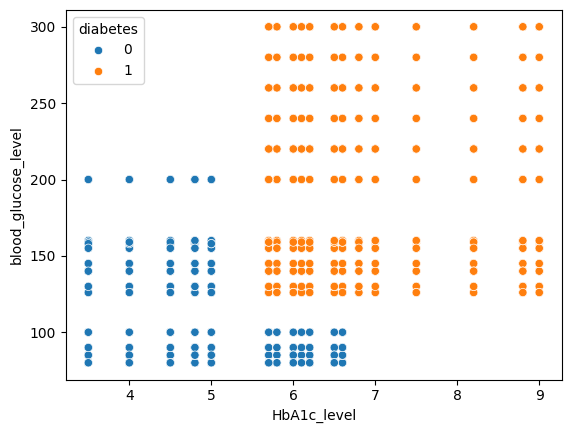

In [31]:
#Graficamos la relevancia de estos datos como un mapa de dispersión de las CARACTERÍSTICAS CON MAYOR IMPORTANCIA
sns.scatterplot(data=datos, x="HbA1c_level", y="blood_glucose_level", hue="diabetes")